In [1]:
#some ideas of this notebook are borrowed from Chung-Hao Lee

#importing libraries just like last time

from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd

train_data = pd.read_csv('../PyLearning/titanic/train.csv')
test_data = pd.read_csv('../PyLearning/titanic/test.csv')

#this time I also combine all the data for EDA and pre-processing
totalData = pd.concat([train_data, test_data], axis = 0)
totalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

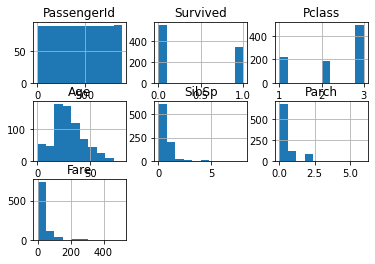

In [4]:
# EDA,using histogram 

train_data.hist()

In [5]:
# Pre-processing, imporving on the last version (more concise!)

# Deleting unwanted columns

unwanted_cols = ['Name', 'Ticket', 'PassengerId', 'Cabin']
train_data = train_data.drop(unwanted_cols, axis = 1)

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

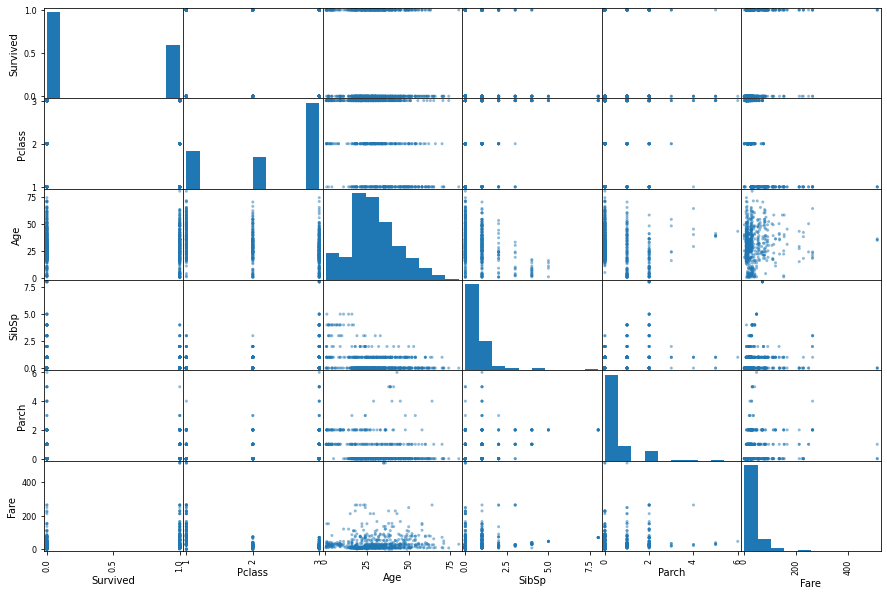

In [6]:
import os # in case I want to save it

# plotting each variable left against other variables to spot relations

pd.plotting.scatter_matrix(train_data, figsize = (15, 10), marker = '.')

In [7]:
# deal with missing values

train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
#impute missing values

train_data['Age'].fillna(round(train_data['Age'].dropna().mean()), inplace = True)
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
#since 'Embarked' has only two null values, maybe just drop it

train_data = train_data.dropna(axis = 0, subset = ['Embarked'], how = 'any')
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
#inspect again

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
# encode categorical values using dummies 

train_data = pd.get_dummies(train_data)

#inspect again (dummies)

train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
# replicate same steps for the test set!
test_data = test_data.drop(unwanted_cols, axis = 1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [13]:
#check and impute missing values
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
test_data = test_data.dropna(axis = 0, subset = ['Fare'], how = 'any')
test_data['Age'].fillna(round(test_data['Age'].dropna().mean()), inplace = True)
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [16]:
# encode categorical variables

test_data = pd.get_dummies(test_data)
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [17]:
# prepartion: predictors and targets 

predictorCols = test_data.columns
targetCols = 'Survived'
train_drop = train_data.drop(['Survived'], axis = 1)
x_data = pd.concat([test_data, train_drop], axis = 0)
x_data = x_data.sample(n = 889, replace = False) #to ensure the same length as the y data

X = x_data[predictorCols].values
y = train_data['Survived'].values

In [18]:
# split, then using knn!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

from sklearn import datasets

clf = KNeighborsClassifier(n_neighbors = 1)
print(clf)
knn = clf.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

#this has slightly imporved since last time

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       169
           1       0.38      0.38      0.38        98

    accuracy                           0.55       267
   macro avg       0.51      0.51      0.51       267
weighted avg       0.55      0.55      0.55       267

[[109  60]
 [ 61  37]]


In [19]:
pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1], dtype=int64)